# Unsupervised learning

In [312]:
# Load the required packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [313]:
# Read the original file
original_path = 'data/original.xlsx'
orig_xls = pd.ExcelFile(original_path)
print(orig_xls.sheet_names)

['Training_set_Staphiloccocus', 'Test_set_Staphiloccocus']


In [314]:
# import the excel sheets separately
df1 = orig_xls.parse('Training_set_Staphiloccocus')
df2 = orig_xls.parse('Test_set_Staphiloccocus')

In [315]:
# import the extra data that we have
additional_path = 'data/additional.xlsx'
addit_xls = pd.ExcelFile(additional_path)
print(addit_xls.sheet_names)

['Sheet1', 'Sheet2']


In [316]:
# there is one more column -- 'Sequence', that we remove to match the rest of the data
df3 = addit_xls.parse('Sheet1').drop(['Sequence'], axis=1)

In [317]:
print(df1.shape, df2.shape, df3.shape)

(298, 13) (74, 13) (52, 13)


In [318]:
# merge the three excel sheets into the training + validation data + test
df = pd.concat([df1, df2, df3], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Normalized Hydrophobic Moment                424 non-null    float64
 1   Normalized Hydrophobicity                    424 non-null    float64
 2   Net Charge                                   424 non-null    int64  
 3   Isoelectric Point                            424 non-null    float64
 4   Penetration Depth                            424 non-null    int64  
 5   Tilt Angle                                   424 non-null    int64  
 6   Propensity to Disordering                    424 non-null    float64
 7   Linear Moment                                424 non-null    float64
 8   Propensity to in vitro Aggregation           424 non-null    float64
 9   Angle Subtended by the Hydrophobic Residues  424 non-null    int64  
 10  Am

In [319]:
# define the feature matrix and labels
X = df.drop(['Class'], axis=1).values
y = df['Class'].values
print(X.shape, y.shape)

(424, 12) (424,)


In [320]:
# standardize data
# from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler() 
#X_std = scaler.fit_transform(X)

### $\color{red}{\textbf{K-means}}$

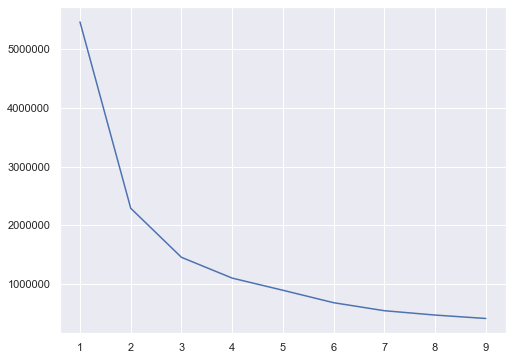

In [321]:
from sklearn.cluster import KMeans

inertia = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=10000).fit(X)
    inertia[k] = kmeans.inertia_

plt.plot(list(inertia.keys()), list(inertia.values()))
plt.show()

In [322]:
kmeans = KMeans(n_clusters=3, init = "k-means++", max_iter=100000000).fit(X_std)
cluster_labels = kmeans.labels_
cluster_labels

array([0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2,
       0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2,
       1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0,
       1, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0,
       1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2,
       2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 1,
       1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0,
       0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2,
       0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1,

In [323]:
dataframe = pd.DataFrame({'k_means': cluster_labels, 'Class': y})

In [324]:
df_reduced = dataframe.groupby(['k_means', 'Class']).size()

In [325]:
df_reduced

k_means  Class
0        0        83
         1        78
1        0        39
         1        42
2        0        92
         1        90
dtype: int64